## import packages

In [68]:
## import packages
from pyclustering.cluster.kmeans import kmeans, kmeans_visualizer
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer, random_center_initializer
from pyclustering.samples.definitions import FCPS_SAMPLES
from pyclustering.utils import read_sample, read_image
from pyclustering.utils.metric import distance_metric
from pyclustering.utils.metric import type_metric
from pyclustering.cluster.elbow import elbow
from pyclustering.cluster.fcm import fcm
from pyclustering.cluster import cluster_visualizer
from pyclustering.utils import draw_image_mask_segments
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from PIL import Image
import cv2 as cv
import numpy as np
from fcmeans import FCM
from seaborn import scatterplot as scatter

## elbow method and cost function

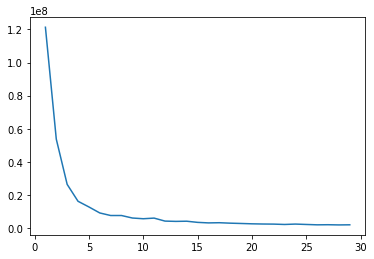

[121362258.73725916, 53694166.325281575, 26349519.465804487, 16120695.71919393, 12696079.787281595, 9062321.423946688, 7516333.30369929, 7516333.303700633, 5997618.175102073, 5564902.897937581, 5945323.480737957, 4140229.6655755066, 3965319.3580932193, 4066256.947984855, 3368882.0750658424, 3048669.13863563, 3156855.0332459547, 2883355.3824412394, 2699168.3108090903, 2494933.8850619686, 2373521.171316867, 2315215.946957957, 2104204.8443261604, 2333409.4443652295, 2101463.7803313527, 1883851.3995880415, 1945835.9076578473, 1828577.6238398436, 1896771.9832016649]


In [69]:
## inja method e elbow ro ejra mikonim bbinim tedad cluster ha cheghadr bashe
sample = read_image('ci.jpg')
cluster_count = 7
kmin, kmax = 1, 30
elbow_instance = elbow(sample, kmin, kmax, initializer=random_center_initializer)
y = elbow_instance.process()
y = y.get_wce()
x = [i for i in range(1,30)]
plt.plot(x,y)
plt.show()
print(y)
# ba erfagh mitoonim begim '10' tedad cluster e monaseb hast

## ground truth image

tedad e rang ha :
25


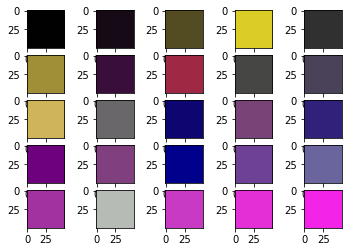

In [72]:
## ground truth :

gt = read_image('ci_gt.png')
t = list(set(map(tuple, gt)))
print('tedad e rang ha :')
print(len(t))
t.sort(key = lambda x: x[2])
images = []
for k in range(len(t)):
    image = np.zeros(7500, dtype = int).reshape(50, 50, 3)
    for i in range(50):
        for j in range(50):
            image[i][j] = t[k]
    images.append(image)
    
f, axarr = plt.subplots(5,5)

index = 0
for i in range(5):
    for j in range(5):
        axarr[i,j].imshow(images[index]);
        index += 1

## clustering ground truth

In [73]:
## inja ground truth ro cluster mikonam
initial_centers = kmeans_plusplus_initializer(gt, cluster_count, kmeans_plusplus_initializer.FARTHEST_CENTER_CANDIDATE).initialize()

# Create instance of K-Means algorithm with prepared centers.
kmeans_instance = kmeans(gt, initial_centers)

# Run cluster analysis and obtain results.
kmeans_instance.process()
gt_clusters = kmeans_instance.get_clusters()
final_centers = kmeans_instance.get_centers()

## clustering sample image

In [70]:
## inja kmeans ba pyclustering
# initial center haro moshakhas mikonim
initial_centers = kmeans_plusplus_initializer(sample, cluster_count, kmeans_plusplus_initializer.FARTHEST_CENTER_CANDIDATE).initialize()
# ye instance az model kmeans dorost mikonim
kmeans_instance = kmeans(sample, initial_centers)
# process mikonim :
kmeans_instance.process()
clusters = kmeans_instance.get_clusters()
final_centers = kmeans_instance.get_centers()
## inja cluster haye kmeans ro zakhire mikonim :
clusters = kmeans_instance.get_clusters()
kmeans_clusters = clusters

## convert clusters to np array

In [74]:
## inja har dotaro sort mikonim
#kmeans_clusters.sort(key = lambda x: x[0])
#gt_clusters.sort(key = lambda x: x[0])

# inaro mikonim np array :
kmeans_clusters = np.array(kmeans_clusters)
gt_clusters = np.array(gt_clusters)

## clustering accuracy

In [75]:
## inja accuracy hessab mikonim:
## cluster count inja 7 tast :
cluster_array = []
acc = 0
for i in range(7):
    
    for j in range(len(kmeans_clusters[i])):
        if kmeans_clusters[i][j] in gt_clusters[i]:
            #acc += 1
            cluster_array.append(kmeans_clusters[i][j])
        for k in range(20):
            value = kmeans_clusters[i][j] + k
            if value in gt_clusters[i]:
                #acc += 1
                cluster_array.append(value)
        
        for k in range(20):
            value = kmeans_clusters[i][j] - k
            if value in gt_clusters[i]:
                #acc += 1
                cluster_array.append(value)
                
print('Accuracy :')
#print((acc / (65535)) * 100)
x_set = set(cluster_array)
print(len(x_set) / 65535)

Accuracy :
0.5842984664682994


## create image from clustered image

In [9]:
## inja ye image ba range cluster ha besaz :
# t rangamoon bood :
# size tasvir ham 65535 * 3 (255 * 257 * 3)
new_image = []
for k in range(65535):
    index_ = [(ix,iy) for ix, row in enumerate(kmeans_clusters) for iy, i in enumerate(row) if i == k]
    cluster_index = index_[0][0]
    color = t[cluster_index]
    color_array = []
    for j in range(3):
        color_array.append(color[j])
    new_image.append(color_array)

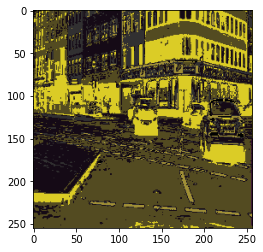

In [10]:
## inja reshapesh mikonim
## bad plotesh mikonim
new_image = np.reshape(new_image, (255, 257, 3))
plt.imshow(new_image)
plt.show()

## kmeans clustering using open-CV

In [13]:
## inja kmeans openCV
img = cv.imread('ci.jpg')
Z = img.reshape((-1,3))
# data type tasvir ro float mikonim
Z = np.float32(Z)
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
ret,label,center=cv.kmeans(Z,cluster_count,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)
## hala dobare int8 mikonim ke tasvir ro neshoon bedim :
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

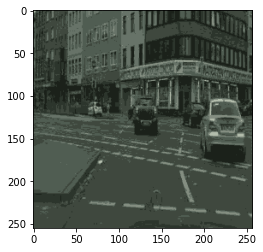

In [14]:
plt.imshow(res2)
plt.show()

## manhattan metrics

In [24]:
# prepare input data and initial centers for cluster analysis using K-Means
# create metric that will be used for clustering
manhattan_metric = distance_metric(type_metric.MANHATTAN)
# create instance of K-Means using specific distance metric:
kmeans_instance = kmeans(sample, initial_centers)
# run cluster analysis and obtain results
kmeans_instance.process()
clusters = kmeans_instance.get_clusters()

## kmeans and PCA clustering

inja hamoon kararo anjam midim :

In [103]:
## inja pca mizanim rooye tasavir :
pca = PCA(n_components = 0.8)
pca.fit(sample)
components = pca.transform(sample)
projected = pca.inverse_transform(components)

In [104]:
projected = np.array(projected, dtype = np.int8)
#plt.imshow(projected)
#plt.show()

In [105]:
## inja pca ro cluster mikonam

print(projected.shape)
initial_centers = kmeans_plusplus_initializer(projected, cluster_count, kmeans_plusplus_initializer.FARTHEST_CENTER_CANDIDATE).initialize()

# Create instance of K-Means algorithm with prepared centers.
kmeans_instance = kmeans(projected, initial_centers)

# Run cluster analysis and obtain results.
kmeans_instance.process()
pca_kmeans_clusters = kmeans_instance.get_clusters()
final_centers = kmeans_instance.get_centers()

(65535, 3)


In [107]:
## inja ye image ba range cluster ha besaz :
# t rangamoon bood :
# size tasvir ham 65535 * 3 (255 * 257 * 3)
new_image_pca_kmeans = []
for k in range(65535):
    index_ = [(ix,iy) for ix, row in enumerate(pca_kmeans_clusters) for iy, i in enumerate(row) if i == k]
    cluster_index = index_[0][0]
    color = t[cluster_index]
    color_array = []
    for j in range(3):
        color_array.append(color[j])
    new_image_pca_kmeans.append(color_array)

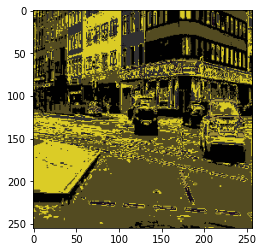

In [110]:
new_image_pca_kmeans = np.array(new_image_pca_kmeans)
new_image_pca_kmeans = new_image_pca_kmeans.reshape(255, 257, 3)
plt.imshow(new_image_pca_kmeans)
plt.show()

In [112]:
## inja vase pca ham accuracy migirim (KMEANS):
cluster_array = []
acc = 0
for i in range(7):
    
    for j in range(len(pca_kmeans_clusters[i])):
        if pca_kmeans_clusters[i][j] in gt_clusters[i]:
            #acc += 1
            cluster_array.append(pca_kmeans_clusters[i][j])
        for k in range(20):
            value = pca_kmeans_clusters[i][j] + k
            if value in gt_clusters[i]:
                #acc += 1
                cluster_array.append(value)
        
        for k in range(20):
            value = pca_kmeans_clusters[i][j] - k
            if value in gt_clusters[i]:
                #acc += 1
                cluster_array.append(value)
                
print('Accuracy :')
#print((acc / (65535)) * 100)
x_set = set(cluster_array)
print(len(x_set) / 65535)

Accuracy :
0.2613870450904097


## FCM algorithm

In [111]:
# fcm
initial_centers = kmeans_plusplus_initializer(sample, cluster_count, kmeans_plusplus_initializer.FARTHEST_CENTER_CANDIDATE).initialize()
# ye instance fcm dorost mikonim :
fcm_instance = fcm(sample, initial_centers)
# run cluster analysis and obtain results
fcm_instance.process()
fcm_clusters = fcm_instance.get_clusters()
centers = fcm_instance.get_centers()

In [18]:
new_image_fcm = []
for k in range(65535):
    index_ = [(ix,iy) for ix, row in enumerate(fcm_clusters) for iy, i in enumerate(row) if i == k]
    cluster_index = index_[0][0]
    color = t[cluster_index]
    color_array = []
    for j in range(3):
        color_array.append(color[j])
    new_image_fcm.append(color_array)

In [64]:
cluster_array = []
acc = 0
for i in range(7):
    
    for j in range(len(fcm_clusters[i])):
        if fcm_clusters[i][j] in gt_clusters[i]:
            #acc += 1
            cluster_array.append(fcm_clusters[i][j])
        for k in range(10):
            value = fcm_clusters[i][j] + k
            if value in gt_clusters[i]:
                #acc += 1
                cluster_array.append(value)
        
        for k in range(10):
            value = fcm_clusters[i][j] - k
            if value in gt_clusters[i]:
                #acc += 1
                cluster_array.append(value)
                
print('Accuracy :')
print((acc / (65535)) * 100)

x_set = set(cluster_array)
#print(len(x_set))

Accuracy :
0.0
44850


In [67]:
len(x_set)/65535
#len(cluster_array)

361321

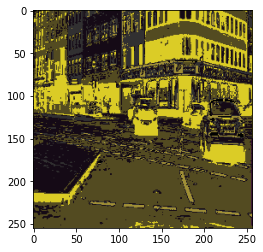

In [19]:
new_image = np.reshape(new_image, (255, 257, 3))
plt.imshow(new_image)
plt.show()

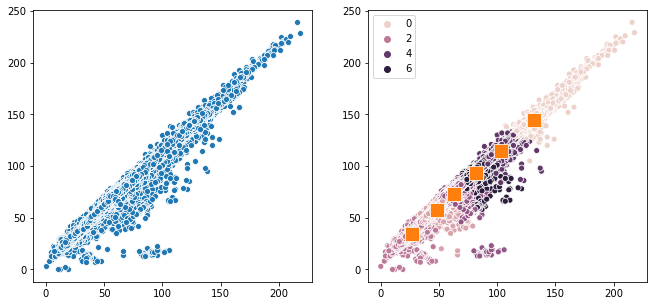

In [37]:
## fcm fuzzy-c-means
sample = np.array(sample)

# fit the fuzzy-c-means
fcm = FCM(n_clusters = 6)
fcm.fit(sample)

# outputs
fcm_centers = fcm.centers
fcm_labels  = fcm.u.argmax(axis = 1)

X = sample
# plot result
%matplotlib inline
f, axes = plt.subplots(1, 2, figsize=(11,5))
scatter(X[:,0], X[:,1], ax=axes[0])
scatter(X[:,0], X[:,1], ax=axes[1], hue=fcm_labels)
scatter(fcm_centers[:,0], fcm_centers[:,1], ax=axes[1],marker="s",s=200)
plt.show()

In [38]:
fcm_labels = np.array(fcm_labels).reshape(255, 257)

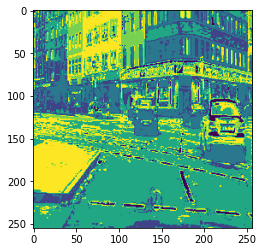

In [39]:
plt.imshow(fcm_labels)
plt.show()